In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_AL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	38
float64		column 2	76
float64		column 3	76
float64		column 4	19
float64		column 5	133
float64		column 6	133
float64		column 7	0
float64		column 8	133


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,730.000000,692.000000,692.000000,749.000000,635.000000,635.000000,768.000000,635.000000
mean,3.875342,119.812139,68.845376,20.526035,78.741732,31.962520,0.471876,32.796850
std,3.386339,31.379881,19.338199,15.962135,113.093703,7.638185,0.331329,11.489317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.243750,24.000000
50%,3.000000,116.000000,72.000000,23.000000,36.000000,32.000000,0.372500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,125.500000,36.550000,0.626250,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,57.300000,2.420000,70.000000


<AxesSubplot:>

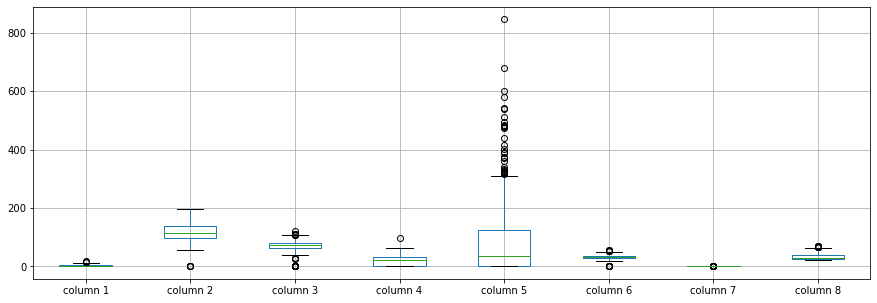

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.875342
column 2    119.812139
column 3     68.845376
column 4     20.526035
column 5     78.741732
column 6     31.962520
column 7      0.471876
column 8     32.796850
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.133159,0.117824,-0.086527,-0.086506,0.028096,-0.040882,0.564013
column 2,0.133159,1.000000,0.156247,0.033991,0.345936,0.200902,0.132554,0.241758
column 3,0.117824,0.156247,1.000000,0.200213,0.076176,0.251026,0.030830,0.274191
column 4,-0.086527,0.033991,0.200213,1.000000,0.412230,0.365215,0.177931,-0.118253
column 5,-0.086506,0.345936,0.076176,0.412230,1.000000,0.204075,0.144355,-0.044459
column 6,0.028096,0.200902,0.251026,0.365215,0.204075,1.000000,0.112740,0.059369
column 7,-0.040882,0.132554,0.030830,0.177931,0.144355,0.112740,1.000000,0.057116
column 8,0.564013,0.241758,0.274191,-0.118253,-0.044459,0.059369,0.057116,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+4,8+4+4,8+4+4+4,8+4+4+4+4,8+4+4+4+4+4,8+4+4+4+4,8+4+4+4,8+4+4,8+4,8], vae_layer = False, seed = 4)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 369.05467160542804
Epoch: 1 , loss: 368.58660952250165
Epoch: 2 , loss: 368.1369555791219
Epoch: 3 , loss: 368.01877148946124
Epoch: 4 , loss: 366.25564765930176
Epoch: 5 , loss: 368.4740111033122
Epoch: 6 , loss: 367.2089373270671
Epoch: 7 , loss: 367.76985867818195
Epoch: 8 , loss: 368.00805854797363
Epoch: 9 , loss: 367.68382867177326
Epoch: 10 , loss: 367.7636311848958
Epoch: 11 , loss: 367.6473916371663
Epoch: 12 , loss: 367.990291595459
Epoch: 13 , loss: 367.0199845631917
Epoch: 14 , loss: 366.02692286173504
Epoch: 15 , loss: 363.34532165527344
Epoch: 16 , loss: 364.3092505137126
Epoch: 17 , loss: 358.4042380650838
Epoch: 18 , loss: 357.65306123097736
Epoch: 19 , loss: 354.22532081604004
Epoch: 20 , loss: 346.65082295735675
Epoch: 21 , loss: 340.1349341074626
Epoch: 22 , loss: 331.7461926142375
Epoch: 23 , loss: 331.91675726572674
Epoch: 24 , loss: 328.6697934468587
Epoch: 25 , loss: 325.954116185

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2277.3402277030837, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.3942370237319234

In [18]:
new_df.iloc[66,:]

column 1     0.000000
column 2     0.083165
column 3    88.000000
column 4    30.000000
column 5     0.082510
column 6     0.083533
column 7     0.855000
column 8     0.083697
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [20]:
imputations[-1].to_excel("PID_AL_10.xlsx", index=False, header=False)